# **Milestone 1**

---

## **Perkenalan**

---

Nama : Darly Guntur Darris Purba

Batch : RMT-030

Data : Kagle - [Laptop Sales Price Prediction 2024](https://www.kaggle.com/datasets/siddiquifaiznaeem/laptop-sales-price-prediction-dataset-2024)

---

## **Objektif**

---


Seorang Data Scientist sedang diminta tolong oleh CEO untuk mengklasifikasikan negara negara yang direkomendasikan sebagai target bantuan untuk memerangi kemiskinan. Sehingga CEO bisa memberikan bantuan dengan total $ 10 juta dengan catatan adanya rasa adil kepada negara negara tersebut 

---

## ***Import Libraries***

---

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

---

## ***Data Loading***

---

In [2]:
# Membuka Data CSV
df = pd.read_csv('Laptop_sales_price_prediction_2024.csv', na_values=['N/A', 'NA', 'NaN'], index_col=False)

In [3]:
# Menampilkan 5 Data Teratas
pd.options.display.max_columns = None
df.head(5)

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,Total_processor,Execution_units,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,RAM_type,Storage_capacity_GB,Storage_type,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,NaN,NaN,0.0,0,12.0,8,DDR4,512,SSD,AMD Radeon RX 6500M,AMD,4.0,False,15.6,1920,1080,141.21,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,NaN,NaN,0.0,0,8.0,8,LPDDR5,512,SSD,AMD Radeon Graphics,AMD,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,Intel Core i3,1215U,12.0,6.0,2.0,4.0,0.0,0,8.0,8,DDR4,512,SSD,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,Intel Core i5,1240P,12.0,12.0,4.0,8.0,0.0,0,16.0,16,LPDDR5,512,SSD,Intel Iris Xe Graphics,Intel,NaN,False,13.3,1080,1920,165.63,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,NaN,NaN,0.0,0,4.0,8,LPDDR4,512,SSD,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS


In [4]:
# Menampilkan 5 Data Terbawah
df.tail(5)

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,Total_processor,Execution_units,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,RAM_type,Storage_capacity_GB,Storage_type,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
1015,1015,MSI Creator Z17 HX Studio A13V Laptop,MSI,247999,4.45,Intel,Intel Core i9,13900H,13.0,14.0,6.0,8.0,0.0,0,20.0,32,DDR5,1000,SSD,NVIDIA GeForce RTX 4070,NVIDIA,8.0,False,17.0,2560,1600,177.58,False,Windows 11 OS
1016,1016,MSI Stealth 16 Mercedes AMG Motorsport A13V Ga...,MSI,292990,4.20,Intel,Intel Core i9,13900H,13.0,14.0,6.0,8.0,0.0,0,20.0,32,DDR5,1000,SSD,NVIDIA GeForce RTX 4070,NVIDIA,8.0,False,16.0,3840,2400,283.02,False,Windows 11 OS
1017,1017,HP Victus 15-fb0131AX Gaming Laptop (AMD Ryzen...,HP,58800,4.40,AMD,AMD Ryzen 5,5600H,5.0,6.0,NaN,NaN,0.0,0,12.0,8,DDR4,512,SSD,AMD Radeon RX 5600M,AMD,4.0,False,15.6,1920,1080,141.21,False,Windows 11 OS
1018,1018,Asus Vivobook 16 2023 M1605YA-MB521WS Laptop (...,Asus,54999,4.25,AMD,AMD Ryzen 5,7530U,7.0,6.0,NaN,NaN,0.0,0,12.0,8,DDR4,512,SSD,AMD Radeon AMD,AMD,NaN,False,16.0,1920,1200,141.51,False,Windows 11 OS
1019,1019,Dell Inspiron 7630 IC7630GHHRH001ORS1 2 in 1 L...,Dell,94490,4.05,Intel,Intel Core i5,1335U,13.0,10.0,2.0,8.0,0.0,0,12.0,8,LPDDR5,512,SSD,Intel Iris Xe Graphics,Intel,NaN,False,16.0,1920,1200,141.51,True,Windows 11 OS


In [5]:
# Menampilan Data Pada Rentang Tertentu 
df.iloc[100:115]

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,Total_processor,Execution_units,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,RAM_type,Storage_capacity_GB,Storage_type,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
100,100,Apple MacBook Air 15 2024 MRYR3HN/A Laptop (Ap...,Apple,133553,4.10,Apple,Apple M3,NaN,NaN,8.0,4.0,4.0,0.0,0,NaN,8,DDR4,256,SSD,10-Core GPU,Apple,NaN,False,15.3,2880,1864,224.22,False,Mac OS
101,101,Samsung Galaxy Book 4 NP750XGK-KS1IN Laptop (I...,Samsung,70990,4.65,Intel,Intel Core 5,120U,NaN,10.0,2.0,8.0,0.0,0,12.0,8,LPDDR4X,512,SSD,Intel Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
102,102,MSI Vector 16 HX A14VGG-279IN Gaming Laptop (1...,MSI,197990,4.45,Intel,Intel Core i7,14700HX,14.0,20.0,8.0,12.0,0.0,0,28.0,32,DDR5,1000,SSD,NVIDIA GeForce RTX 4070,NVIDIA,8.0,False,16.0,2560,1600,188.68,False,Windows 11 OS
103,103,Lenovo IdeaPad Slim 3 82H803W7IN Laptop (11th ...,Lenovo,35500,4.45,Intel,Intel Core i3,1115G4,11.0,2.0,NaN,NaN,0.0,0,4.0,8,DDR4,512,SSD,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
104,104,Acer Aspire Lite AL15-51 Laptop (11th Gen Core...,Acer,49499,4.25,Intel,Intel Core i7,1165G7,11.0,4.0,NaN,NaN,0.0,0,8.0,16,DDR4,512,SSD,Intel Iris Xe Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
105,105,HP Envy x360 15-fe0014TX Laptop (13th Gen Core...,HP,122000,4.15,Intel,Intel Core i7,1355U,13.0,10.0,2.0,8.0,0.0,0,12.0,16,LPDDR5,1000,SSD,NVIDIA GeForce RTX 3050,NVIDIA,4.0,False,15.6,1920,1080,141.21,True,Windows 11 OS
106,106,Lenovo V14 82TS005DIH Laptop (12th Gen Core i5...,Lenovo,43490,4.35,Intel,Intel Core i5,1235U,12.0,10.0,2.0,8.0,0.0,0,12.0,8,DDR4,512,SSD,Intel Integrated UHD,Intel,NaN,True,14.0,1920,1080,157.35,False,DOS OS
107,107,Lenovo IdeaPad Slim 5 14IMH9 83DA0043IN Laptop...,Lenovo,79990,4.35,Intel,Intel Core Ultra,125H,NaN,14.0,4.0,8.0,2.0,1,18.0,16,LPDDR5,1000,SSD,Intel Arc Graphics,Intel,NaN,False,14.0,1920,1200,161.73,False,Windows 11 OS
108,108,HP Omen 14-fb0089TX Gaming Laptop (Intel Core ...,HP,175999,4.50,Intel,Intel Core Ultra,155H,NaN,16.0,6.0,8.0,2.0,1,22.0,16,LPDDR5X,1000,SSD,NVIDIA GeForce RTX 4060,NVIDIA,8.0,False,14.0,2880,1800,242.59,False,Windows 11 OS
109,109,HP Omen 16-xf0081AX Gaming Laptop (AMD Ryzen 7...,HP,135999,4.35,AMD,AMD Ryzen 7,7840HS,7.0,8.0,NaN,NaN,0.0,0,16.0,32,DDR5,1000,SSD,NVIDIA GeForce RTX 4060,NVIDIA,8.0,False,16.0,1440,2560,183.58,False,Windows 11 OS


In [6]:
# Menampilkan Kolom pada Data
df.columns

Index(['Unnamed: 0', 'Name', 'Brand', 'Price', 'Rating', 'Processor_brand',
       'Processor_name', 'Processor_variant', 'Processor_gen',
       'Core_per_processor', 'Total_processor', 'Execution_units',
       'Low_Power_Cores', 'Energy_Efficient_Units', 'Threads', 'RAM_GB',
       'RAM_type', 'Storage_capacity_GB', 'Storage_type', 'Graphics_name',
       'Graphics_brand', 'Graphics_GB', 'Graphics_integreted',
       'Display_size_inches', 'Horizontal_pixel', 'Vertical_pixel', 'ppi',
       'Touch_screen', 'Operating_system'],
      dtype='object')

In [7]:
# Menampilkan Jumlah Baris dan Kolom
df.shape

(1020, 29)

In [8]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1020 non-null   int64  
 1   Name                    1020 non-null   object 
 2   Brand                   1020 non-null   object 
 3   Price                   1020 non-null   int64  
 4   Rating                  1020 non-null   float64
 5   Processor_brand         1020 non-null   object 
 6   Processor_name          1020 non-null   object 
 7   Processor_variant       996 non-null    object 
 8   Processor_gen           891 non-null    float64
 9   Core_per_processor      1008 non-null   float64
 10  Total_processor         573 non-null    float64
 11  Execution_units         573 non-null    float64
 12  Low_Power_Cores         1020 non-null   float64
 13  Energy_Efficient_Units  1020 non-null   int64  
 14  Threads                 972 non-null    

***Insight:***

Adapun keterangan untuk masing masing kolom yakni:

Kolom | Keterangan
--- | ---
Unnamed: 0 | Kolom indeks yang mungkin ditambahkan secara otomatis oleh perangkat lunak atau bisa juga merupakan kolom untuk nomor urut.
Name | Nama model laptop.
Brand | Merek laptop.
Price | Harga penjualan laptop, mungkin dalam mata uang tertentu.
Rating | Penilaian atau rating laptop, bisa jadi berdasarkan ulasan pengguna atau lembaga penilai.
Processor_brand | Merek dari prosesor yang digunakan dalam laptop.
Processor_name | Nama dari prosesor yang digunakan.
Processor_variant | Varian spesifik dari prosesor.
Processor_gen | Generasi dari prosesor.
Core_per_processor | Jumlah inti (core) dalam satu prosesor.
Total_processor | Total jumlah prosesor.
Execution_units | Unit eksekusi, mungkin berkaitan dengan prosesor grafis (GPU).
Low_Power_Cores | Jumlah inti (core) hemat daya.
Energy_Efficient_Units | Unit hemat energi.
Threads | Jumlah thread yang dapat ditangani oleh prosesor.
RAM_GB | Kapasitas RAM dalam gigabyte (GB).
RAM_type | Tipe RAM yang digunakan (misalnya DDR4).
Storage_capacity_GB | Kapasitas penyimpanan dalam gigabyte (GB).
Storage_type: Jenis penyimpanan (misalnya SSD, HDD).
Graphics_name | Nama kartu grafis yang digunakan.
Graphics_brand | Merek dari kartu grafis.
Graphics_GB | Kapasitas memori grafis dalam gigabyte (GB).
Graphics_integrated | Menyatakan apakah kartu grafis terintegrasi ke dalam prosesor atau tidak.
Display_size_inches | Ukuran layar dalam inci.
Horizontal_pixel | Jumlah piksel secara horizontal pada layar.
Vertical_pixel | Jumlah piksel secara vertikal pada layar.
ppi | Piksel per inci, yang mengindikasikan kepadatan piksel layar.
Touch_screen | Menyatakan apakah layar mendukung input sentuh atau tidak.
Operating_system | Sistem operasi yang diinstal pada laptop.

In [9]:
# Melihat jumlah Data Numerik dan Kategorikal
df.dtypes.value_counts()

object     11
float64    10
int64       7
bool        1
Name: count, dtype: int64

In [10]:
# Menampilkan Duplikat
df.duplicated().sum()

0

***Insight:***

Pada dataframe `Laptop_sales_price_prediction_2024.csv` dapat ditemukan:

- Terdapat 1020 baris dan 29 kolom 

- Ditemukan ada 17 data numerik dan 11 data kategorikal

- Tidak ditemukan data yang mengalami duplikasi

- Ditemukan data yang mengalami *missing value* seperti :

    - `Processor_variant`

    - `Processor_gen`

    - `Total_processor`

    - `Execution_units`

    - `Threads`

    - `RAM_type` 

    - `Graphics_name`

    - `Graphics_brand`

    - `Graphics_GB`

    - `Graphics_integreted` 

---

## ***Exploratory Data Analysis***

---

### **Cek Statistika Deskriptif**

---

In [11]:
# Melihat Informasi Statistika
df.describe()

,Unnamed: 0,Price,Rating,Processor_gen,Core_per_processor,Total_processor,Execution_units,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,Storage_capacity_GB,Graphics_GB,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi
count,1020.000000,1020.000000,1020.000000,891.000000,1008.000000,573.000000,573.000000,1020.000000,1020.000000,972.000000,1020.000000,1020.000000,368.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,509.500000,82063.474510,4.373676,10.450056,8.572421,3.926702,6.998255,0.086275,0.043137,12.817901,13.992157,627.733333,5.940217,15.163775,2035.512745,1214.019608,157.178265
std,294.592939,66502.150607,0.233295,2.966579,4.375012,1.954429,2.680217,0.406531,0.203266,5.677459,7.189564,316.911679,2.667130,1.001537,409.209289,306.863086,33.585713
min,0.000000,8000.000000,3.950000,1.000000,2.000000,1.000000,4.000000,0.000000,0.000000,2.000000,2.000000,32.000000,2.000000,11.600000,1080.000000,768.000000,100.450000
25%,254.750000,43990.000000,4.200000,7.000000,6.000000,2.000000,4.000000,0.000000,0.000000,8.000000,8.000000,512.000000,4.000000,14.000000,1920.000000,1080.000000,141.210000
50%,509.500000,63689.500000,4.350000,12.000000,8.000000,4.000000,8.000000,0.000000,0.000000,12.000000,16.000000,512.000000,6.000000,15.600000,1920.000000,1080.000000,141.210000
75%,764.250000,94990.000000,4.550000,13.000000,10.000000,6.000000,8.000000,0.000000,0.000000,16.000000,16.000000,512.000000,8.000000,15.600000,1920.000000,1200.000000,161.730000
max,1019.000000,599990.000000,4.750000,14.000000,24.000000,12.000000,16.000000,2.000000,1.000000,32.000000,64.000000,4000.000000,16.000000,18.000000,3840.000000,2560.000000,337.930000


***Insight:***

Untuk analisa statistika deskriptif. Dapat dilihat sekilas perbandingan antara nilai median dan mean. Ternyata masih ada nilai mean yang lebih tinggi dari median hal ini menandakan ada skewness yang bersifat positif, namun untuk beberapa data masih terlihat nilai median lebih tinggi dari mean yang menandakan adanya skewness yang bersifat negatif. Selain dari positive skewness dann negative skewnees, ditemukan data yang memilki distribusi normal pada beberapa kolom

---

### **Menampilkan Boxplot Untuk Setiap Kolom**

---

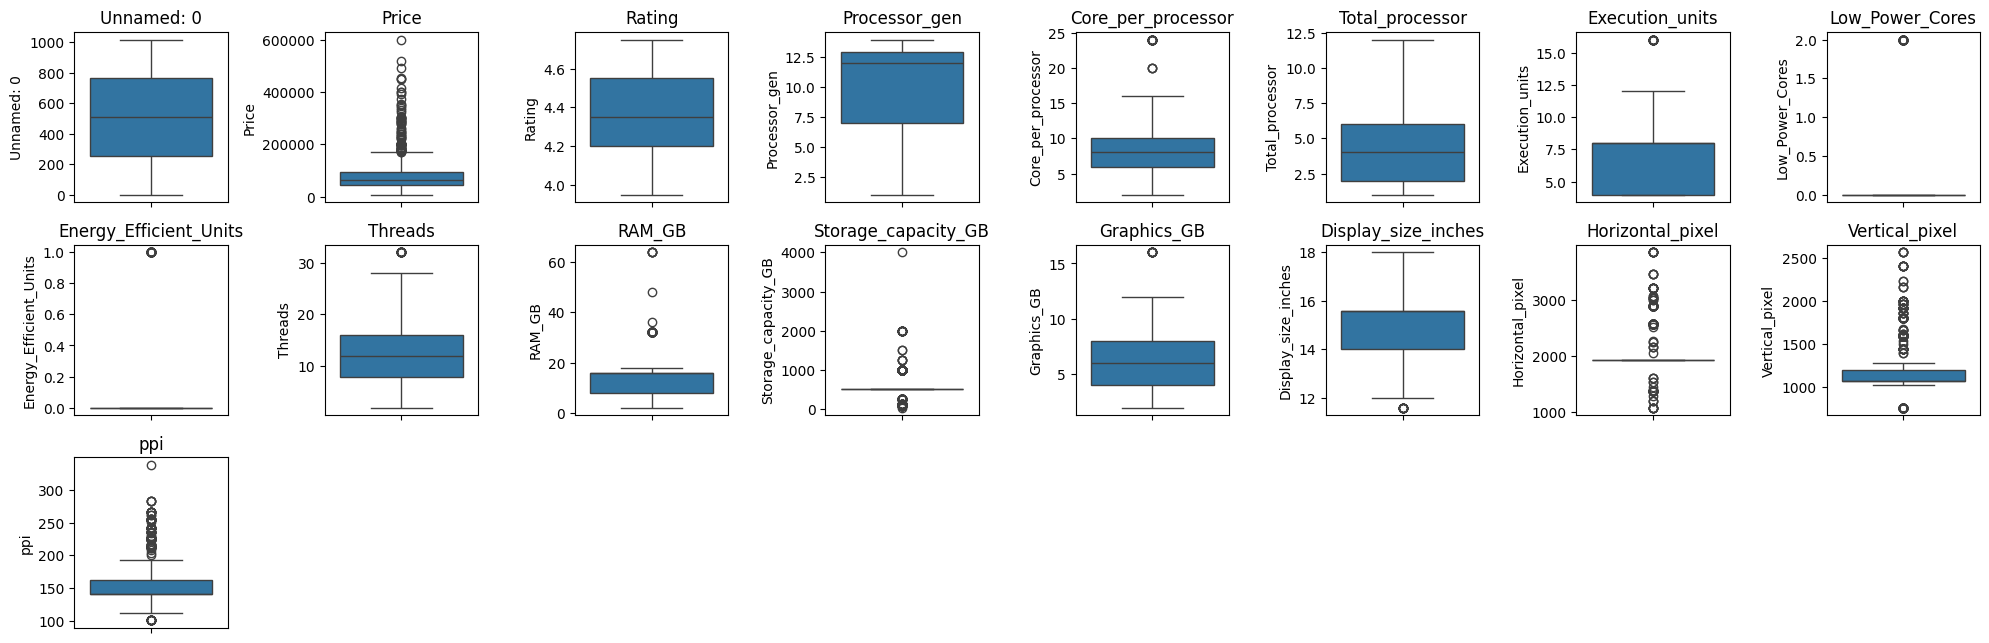

In [12]:
# Membuat Fungsi Boxplot
def boxplot_for_all_columns(df):

    # Filter hanya kolom numerik
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    
    # Mengatur ukuran plot
    plt.figure(figsize=(20, 15))

    # Loop melalui setiap kolom numerik dan membuat box plot
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(7, 8, i)
        sns.boxplot(y=df[column])
        plt.title(column)

    plt.tight_layout()
    plt.show()

# Contoh pemanggilan fungsi
boxplot_for_all_columns(df)

***Insight:***

Karena ditemukan skewness pada analisa statistika deskriptif, maka dilakukan visualisasi pada setiap kolomnya untuk melihat outlier. Ternyata ditemukan outlier pada kolom:

- Price

- Core_per_processor

- Execution_units

- Low_Power_Cores

- Energy_Efficient_Units

- Threads

- RAM_GB

- Storage_capacity_GB

- Graphics_GB

- Horizontal_pixel

- Vertical_pixel

- ppi

---

## ***Feature Engineering***

---

### ***Menghapus Kolom*** 

---

In [13]:
df = df.drop(["Unnamed: 0", "Name", "Graphics_name"], axis=1)

***Insight:***

Dilakukan penghapusan pada kolom :

- `Unnamed: 0`: Menandakan index pada kolom

- `Name`, `Graphics_name` ; Untuk menghindari *High Cardinality*

---

### ***Missing Value Handling***

---

#### ***Menampilkan Persentase Missing Value***

---

In [14]:
# Melihat Missing Value
missing_values = df.isnull().sum()

# Menghitung total baris data
total_rows = df.shape[0]

# Menghitung persentase missing value tiap kolom
missing_percentage = (missing_values / total_rows) * 100

# Menampilkan persentase missing value tiap kolom
print("Persentase Jumlah Missing Value Tiap Kolom:")
print(missing_percentage)

Persentase Jumlah Missing Value Tiap Kolom:
Brand                      0.000000
Price                      0.000000
Rating                     0.000000
Processor_brand            0.000000
Processor_name             0.000000
Processor_variant          2.352941
Processor_gen             12.647059
Core_per_processor         1.176471
Total_processor           43.823529
Execution_units           43.823529
Low_Power_Cores            0.000000
Energy_Efficient_Units     0.000000
Threads                    4.705882
RAM_GB                     0.000000
RAM_type                   2.156863
Storage_capacity_GB        0.000000
Storage_type               0.000000
Graphics_brand             0.196078
Graphics_GB               63.921569
Graphics_integreted        0.196078
Display_size_inches        0.000000
Horizontal_pixel           0.000000
Vertical_pixel             0.000000
ppi                        0.000000
Touch_screen               0.000000
Operating_system           0.000000
dtype: float64


***Insight:***

Ternyata nilai *missing value* pada *dataframe* melebihi 5% adapun pertimbangan yang dilakukan untuk mengatasi ini adalah:

- Imputasi Mean / Median 

- Menghapus Kolom 

Untuk mempertimbangkan cara mengatasinya akan digunakan metode *Domain Knowledge* 

---

#### ***Menghapus Missing Value***

---

In [15]:
# Menghapus Kolom
df = df.drop(["Total_processor", "Execution_units", "Graphics_GB", "Threads"], axis=1)

***Insight:***

Berikut adalah beberapa penjelasan untuk beberapa kolom:

- `Processor Generation (Generasi Prosesor)` : Generasi prosesor dapat memberikan indikasi tentang kinerja dan efisiensi energi. Prosesor generasi terbaru cenderung menawarkan kinerja yang lebih baik dan konsumsi daya yang lebih rendah, yang dapat menjadi faktor penting bagi pembeli yang membutuhkan kinerja tinggi atau kebutuhan daya yang hemat.

- `Total Processor (Jumlah Prosesor)` : Jumlah prosesor dapat memengaruhi kinerja multitasking dan pemrosesan data secara umum. Pembeli yang memerlukan kinerja multitasking yang tinggi atau pemrosesan data paralel mungkin mempertimbangkan jumlah prosesor yang lebih besar.

- `Graphics GB (Kapasitas Memori Grafis)` : Kapasitas memori grafis dapat memengaruhi kinerja grafis laptop, terutama untuk pengguna yang melakukan tugas-tugas yang membutuhkan pemrosesan grafis yang intensif, seperti permainan, desain grafis, atau pemrosesan video. Kapasitas memori grafis yang lebih besar biasanya menghasilkan kinerja grafis yang lebih baik.

- `Execution Units (Unit Eksekusi)` : Meskipun tidak selalu menjadi prioritas utama, unit eksekusi yang lebih tinggi dapat memberikan kinerja grafis yang lebih baik, terutama untuk laptop dengan prosesor grafis terintegrasi. Hal ini juga penting untuk aplikasi yang memanfaatkan komputasi paralel, seperti pengolahan gambar atau pemrosesan data.

- `Threads` : Dalam konteks prosesor merujuk pada unit pemrosesan independen di dalam CPU yang dapat mengeksekusi instruksi secara bersamaan. Ini berarti, semakin banyak thread yang dapat ditangani oleh prosesor, semakin banyak instruksi yang dapat dieksekusi secara bersamaan.Thread memungkinkan prosesor untuk melakukan multitasking dan pemrosesan paralel, di mana beberapa tugas atau instruksi dapat dijalankan secara bersamaan. Ini membantu meningkatkan kinerja komputasi secara keseluruhan, mempercepat waktu pemrosesan, dan memungkinkan aplikasi untuk berjalan lebih lancar dan responsif.

Bedasarkan defenisi yang dipaparkan, kelihatan beberapa kolom penting sebagai pertimbangan untuk membeli laptop. Namun, dengan mempertimbangkan data yang didapat melebihi 10 %, akan dilakukan penghapusan pada kolom tertentu. Selain itu, untuk nilai *missing value* tidak akan dilakukan imputasi. Pertimbangannya adalah karena akan merusak identitas dari masing-masing laptop.

---

#### ***Memisahkan Kolom Kategorikal dan Numerik*** 

---

In [16]:
# Mendapat nilai kategorik dan nilai numerik

cat_columns = df.select_dtypes(include=['object']).columns.tolist()
num_columns = df.select_dtypes(include = np.number).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['Price', 'Rating', 'Processor_gen', 'Core_per_processor', 'Low_Power_Cores', 'Energy_Efficient_Units', 'RAM_GB', 'Storage_capacity_GB', 'Display_size_inches', 'Horizontal_pixel', 'Vertical_pixel', 'ppi']
Categorical Columns:  ['Brand', 'Processor_brand', 'Processor_name', 'Processor_variant', 'RAM_type', 'Storage_type', 'Graphics_brand', 'Graphics_integreted', 'Operating_system']


***Insight:***

Dilakukan pemisahan antara kolom numerik dan kolom kategorik yang dimana nantinya untuk dua tipe jenis data ini akan dilakukan *handling* yang berbeda.

---

### ***Splitting* Dataset**

---

In [17]:
# Memisahkan `X` and `y`

X = df.drop(['Price'], axis=1)
y = df['Price']

In [18]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_Train size : ', X_train.shape)
print('X_Test size  : ', X_test.shape)
print('y_Train size  : ', y_train.shape)
print('y_Test size  : ', y_test.shape)

X_Train size :  (816, 21)
X_Test size  :  (204, 21)
y_Train size  :  (816,)
y_Test size  :  (204,)


***Insight:***

*Splitting* dataset telah dilakukan dengan proporsi data train / test = 80 / 20 (dalam satuan persen). Adapun random state yang digunakan bernilai 42

---

#### ***Menghapus Missing Value***

---

In [19]:
# Membuat DataFrame baru yang berisi baris dengan nilai yang hilang pada X_train
missing_rows = X_train[X_train.isnull().any(axis=1)]

# Menggunakan indeks dari DataFrame yang baru untuk mengindeks y_train
y_train.drop(missing_rows.index, inplace=True)
X_train.drop(missing_rows.index, inplace=True)

In [20]:
print('X_Train size : ', X_train.shape)
print('X_Test size  : ', X_test.shape)
print('y_Train size  : ', y_train.shape)
print('y_Test size  : ', y_test.shape)

X_Train size :  (698, 21)
X_Test size  :  (204, 21)
y_Train size  :  (698,)
y_Test size  :  (204,)


***Insight:***

Dilakukan penghapusan sekali lagi pada data yang mengalami *missing value* pada baris tertentu. Alasan dilakukan penghapusan dibandingkan imputasi adalah untuk menjaga keaslian data pada data yang ingin dijadikan model *machine learning*

---

### ***Outlier Handling***

---

#### **Memisahkan Data Kategorik dan Numerik**

---

In [21]:
# Melakukan seleksi data kategorik
X_train_kategorik = X_train.select_dtypes(include=['object', 'bool'])
X_test_kategorik = X_test.select_dtypes(include=['object', 'bool'])

# Melakukan seleksi data numerik
X_train_numerik = X_train.select_dtypes(exclude=['object', 'bool'])
X_test_numerik = X_test.select_dtypes(exclude=['object', 'bool'])

***Insight:***

Data kategorik dan data numerik akan dilakukan karena akan dilakukan *handling* secara terpisah  

---

#### **Menampilkan Persentase Outlier**

---

In [22]:
# Fungsi Pengecekan Skewness Data
def cek_skewness(data):
    skewness_data = pd.DataFrame({'Skewness': data.skew()})
    return skewness_data

In [23]:
# Melihat Skewness 
X_train_skew = cek_skewness(X_train_numerik)
X_test_skew = cek_skewness(X_test_numerik)

In [24]:
# Fungsi Menghitung Persentase Outlier
def calculate_outlier_percentage(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_percentage = (len(outliers) / len(data)) * 100
    return "{:.2f}%".format(outlier_percentage)

# Fungsi Melihat Hasil Outlier di Setiap Kolom (Data Dictionary)
def calculate_outlier_percentage_all_columns(data):
    outlier_percentage_dict = {}
    for column in data.columns:
        outlier_percentage = calculate_outlier_percentage(data[column])
        outlier_percentage_dict[column] = outlier_percentage
    return outlier_percentage_dict

In [25]:
# Menampilkan Persentase Outlier
X_train_numerik_persentase = calculate_outlier_percentage_all_columns(X_train_numerik)
X_test_numerik_persentase = calculate_outlier_percentage_all_columns(X_test_numerik)

# Membuat DataFrame dari hasil perhitungan
X_train_numerik_df = pd.DataFrame.from_dict(X_train_numerik_persentase, orient='index', columns=['Train_Outlier_Percentage_Before'])
X_test_numerik_df = pd.DataFrame.from_dict(X_test_numerik_persentase, orient='index', columns=['Test_Outlier_Percentage_Before'])
X_train_numerik_skew = X_train_skew.rename(columns={'Skewness': 'X_train Skewness_Before'})
X_test_numerik_skew = X_test_skew.rename(columns={'Skewness': 'X_test Skewness_Before'})

# Menggabungkan kedua DataFrame
merged_df = pd.concat([X_train_numerik_df, X_test_numerik_df, X_train_numerik_skew, X_test_numerik_skew], axis=1)

# Menampilkan DataFrame hasil penggabungan
merged_df

,Train_Outlier_Percentage_Before,Test_Outlier_Percentage_Before,X_train Skewness_Before,X_test Skewness_Before
Rating,0.00%,0.00%,0.038587,0.004453
Processor_gen,0.00%,0.00%,-0.905870,-1.089506
Core_per_processor,3.15%,1.96%,1.297204,0.923194
Low_Power_Cores,0.00%,5.88%,0.000000,3.777835
Energy_Efficient_Units,0.00%,5.88%,0.000000,3.777835
RAM_GB,5.73%,5.39%,2.877976,2.668380
Storage_capacity_GB,25.64%,32.35%,2.433906,4.242292
Display_size_inches,0.00%,1.47%,-0.591280,-0.860566
Horizontal_pixel,18.91%,23.04%,2.282708,1.050147
Vertical_pixel,18.77%,22.55%,2.365805,1.820423


***Insight:***

Setelah dilihat nilai persentase pada outlier `X_train_numerik` dengan `X_test_numerik` ditemukan nilai persentase outlier yang sangat tinggil pada kolom `Storage_capacity_GB`, `Horizontal_pixel` dan `Vertical_pixel`. Hal ini disebabkan pada spesifikasi laptop ada standar yang digunakan misal pada kolom `Storage_capacity_GB` itu menggunakan penyimpanan data sebesar 512 GB, 1000 Gb. Hal ini berlaku pada kolom `Horizontal_pixel` dan `Vertical_pixel`. Untuk data *skewness* terlihat tidak berada di antara 0,5 dan 1 atau -1 dan 0,5 pada beberapa kolom yang menandakan data tidak terdistribusi normal. Hal ini akan diatasi dengan menggunakan metode *capping / sensoring*

---

#### ***Capping/Sensoring* Data**

---

##### **Melihat Boxplot Tiap Kolom**

---

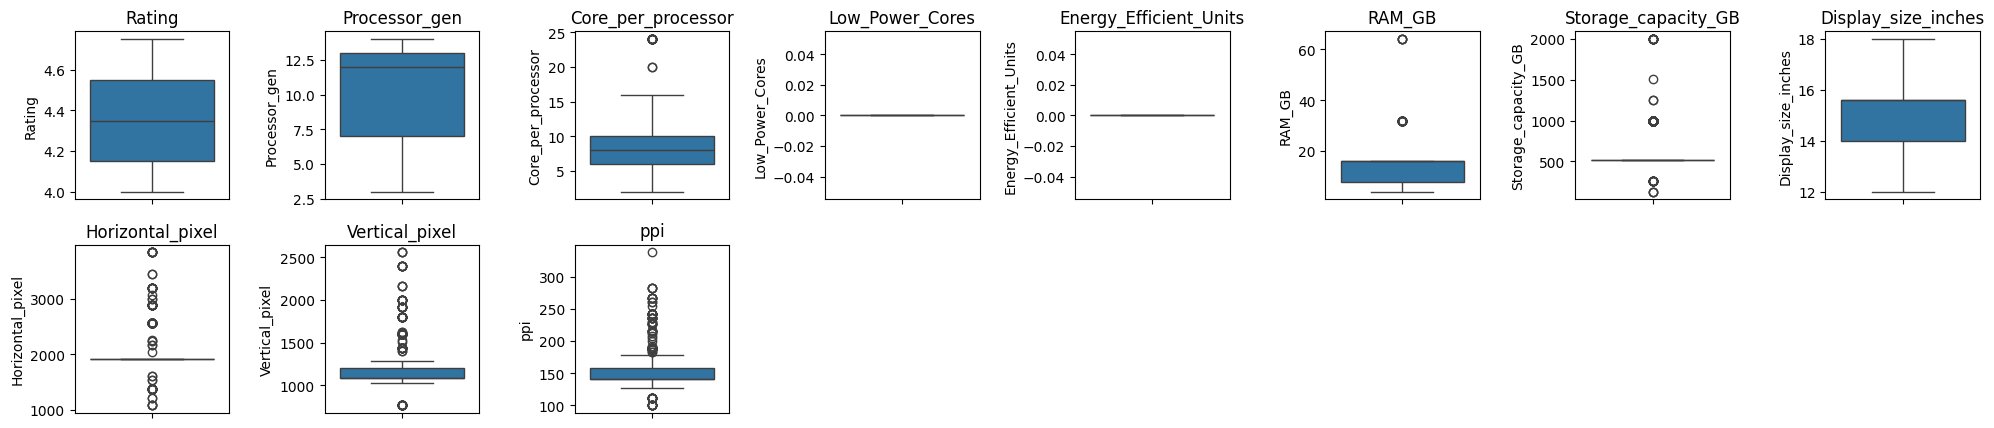

In [26]:
# Melihat Boxplot Tiap Kolom
boxplot_for_all_columns(X_train_numerik)

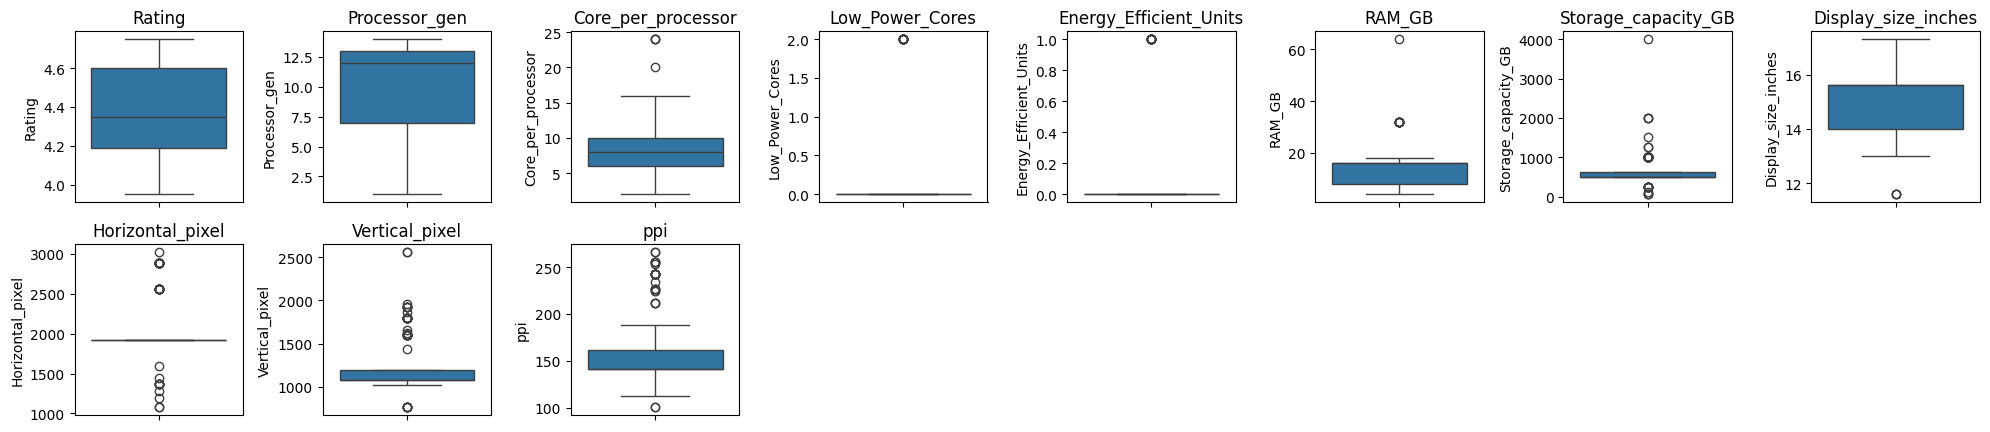

In [27]:
# Melihat Boxplot Tiap Kolom
boxplot_for_all_columns(X_test_numerik)

In [28]:
# Melihat Nilai Unik
print(X_train_numerik.Low_Power_Cores.unique())
print(X_test_numerik.Low_Power_Cores.unique())

[0.]
[0. 2.]


In [29]:
# Melihat Nilai Unik
print(X_train_numerik.Energy_Efficient_Units.unique())
print(X_test_numerik.Energy_Efficient_Units.unique())

[0]
[0 1]


In [30]:
# Melihat Nilai Unik
print(X_train_numerik.Storage_capacity_GB.unique())
print(X_test_numerik.Storage_capacity_GB.unique())

[ 512 1000 1256  256 2000  128 1512]
[1000  512 2000  256  128 1256 4000   64 1512]


***Insight:***

Sebelum dilakukan *capping / sensoring* pada data, dilakukan analisa bedasarkan outliernya dengan menampilkan boxplot pada tiap kolomnya. Terlihat pada kolom `Low_Power_Cores` dan `Energy_Efficient_Units` memiliki jarak outlier yang terlalu jauh. Selain itu, split memberikan nilai pada kolom test semua data yang memiliki nilai unik. 

---

##### **Memisahkan Kolom Numerik**

---

In [32]:
# Memisahkan X_train_numerik menjadi dua DataFrame
X_train_numerik1 = X_train_numerik.drop(['Low_Power_Cores', 'Energy_Efficient_Units', 'Storage_capacity_GB', 'Horizontal_pixel'], axis=1)
X_train_numerik2 = X_train_numerik[['Low_Power_Cores', 'Energy_Efficient_Units', 'Storage_capacity_GB', 'Horizontal_pixel']]
X_test_numerik1 = X_train_numerik.drop(['Low_Power_Cores', 'Energy_Efficient_Units', 'Storage_capacity_GB', 'Horizontal_pixel'], axis=1)
X_test_numerik2 = X_train_numerik[['Low_Power_Cores', 'Energy_Efficient_Units', 'Storage_capacity_GB', 'Horizontal_pixel']]

In [33]:
# Fungsi Winsorizer
def winsoriser(df):
    # Inisialisasi Winsorizer untuk kolom saat ini
    winsorizer = Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=1.5,
        missing_values='ignore'
    )
    winsorizer2 = Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=3,
        missing_values='ignore'
    )
    for column in df.columns:
        # Melakukan censoring pada data train (df)
        if (abs(df[column].skew())  <= 1) & (abs(df[column].skew()) >= 0.5):
            df[column] = winsorizer.fit_transform(df[[column]])
        else:
            df[column] = winsorizer2.fit_transform(df[[column]])
    return df

In [34]:
# Winsorizer Data
X_train_new = winsoriser(X_train_numerik1)
X_test_new = winsoriser(X_test_numerik1)

In [36]:
# Melihat Skewness 
X_train_skew = cek_skewness(X_train_new)
X_test_skew = cek_skewness(X_test_new)

In [37]:
# Menampilkan Persentase Outlier
X_train_numerik_winsorizer_persentase = calculate_outlier_percentage_all_columns(X_train_new)
X_test_numerik_winsorizer_persentase = calculate_outlier_percentage_all_columns(X_test_new)

# Membuat DataFrame dari hasil perhitungan
X_train_numerik_winsorizer_df = pd.DataFrame.from_dict(X_train_numerik_winsorizer_persentase, orient='index', columns=['Train_Outlier_Percentage_After'])
X_test_numerik_winsorizer_df = pd.DataFrame.from_dict(X_test_numerik_winsorizer_persentase, orient='index', columns=['Test_Outlier_Percentage_After'])
X_train_numerik_winsorizer_skew = X_test_skew.rename(columns={'Skewness': 'X_train Skewness_After'})
X_test_numerik_winsorizer_skew = X_test_skew.rename(columns={'Skewness': 'X_test Skewness_After'})

# Menggabungkan kedua DataFrame
merged_df1 = pd.concat([X_train_numerik_winsorizer_df, X_test_numerik_winsorizer_df, X_train_numerik_winsorizer_skew, X_test_numerik_winsorizer_skew], axis=1)

# Menampilkan DataFrame hasil penggabungan
merged_df1

,Train_Outlier_Percentage_After,Test_Outlier_Percentage_After,X_train Skewness_After,X_test Skewness_After
Rating,0.00%,0.00%,0.038587,0.038587
Processor_gen,0.00%,0.00%,-0.905870,-0.905870
Core_per_processor,3.15%,3.15%,1.008662,1.008662
RAM_GB,5.73%,5.73%,1.481143,1.481143
Display_size_inches,0.00%,0.00%,-0.591280,-0.591280
Vertical_pixel,18.77%,18.77%,1.161145,1.161145
ppi,16.91%,16.91%,1.124453,1.124453


In [38]:
# Merge DataFrame 
gabungan = pd.concat([merged_df, merged_df1], axis=1)
gabungan

,Train_Outlier_Percentage_Before,Test_Outlier_Percentage_Before,X_train Skewness_Before,X_test Skewness_Before,Train_Outlier_Percentage_After,Test_Outlier_Percentage_After,X_train Skewness_After,X_test Skewness_After
Rating,0.00%,0.00%,0.038587,0.004453,0.00%,0.00%,0.038587,0.038587
Processor_gen,0.00%,0.00%,-0.905870,-1.089506,0.00%,0.00%,-0.905870,-0.905870
Core_per_processor,3.15%,1.96%,1.297204,0.923194,3.15%,3.15%,1.008662,1.008662
Low_Power_Cores,0.00%,5.88%,0.000000,3.777835,NaN,NaN,NaN,NaN
Energy_Efficient_Units,0.00%,5.88%,0.000000,3.777835,NaN,NaN,NaN,NaN
RAM_GB,5.73%,5.39%,2.877976,2.668380,5.73%,5.73%,1.481143,1.481143
Storage_capacity_GB,25.64%,32.35%,2.433906,4.242292,NaN,NaN,NaN,NaN
Display_size_inches,0.00%,1.47%,-0.591280,-0.860566,0.00%,0.00%,-0.591280,-0.591280
Horizontal_pixel,18.91%,23.04%,2.282708,1.050147,NaN,NaN,NaN,NaN
Vertical_pixel,18.77%,22.55%,2.365805,1.820423,18.77%,18.77%,1.161145,1.161145


In [39]:
# Menggabungkan kedua DataFrame
X_train_new1 = pd.concat([X_train_new, X_train_numerik2], axis=1)
X_test_new1 = pd.concat([X_test_new, X_test_numerik2], axis=1)

***Insight:***

Setelah dilakukan *capping / sensoring* pada data, terlihat pada beberapa kolom mengalami pengurangan pada *skewness* kecuali pada kolom `Low_Power_Cores`, `Energy_Efficient_Units`, `Storage_capacity_GB`, `Horizontal_pixel` yang memiliki jarak outlier yang terlalu jauh. Kemudian, hasil sensor akan digabungkan dengan data yang telah dipisahkan

---

### ***Scalling & Encoding***

---

In [44]:
# Menentukan Jenis Scalling 
scaler = RobustScaler()

In [51]:
# Inisiasi Encoder
ohe = OneHotEncoder()

***Insight:***

Pada permodelan ini akan digunakan *scalling* berupa Robust Scaler. Alasan pemilihan *scale* ini adalah karena ketahanannya terhadap outlier. Hal ini erat kaitannya dengan nilai data yang masih memiliku outlier. Sedangkan untuk *encoding* akan digunakan one-hot encoder. Alasan menggunakan *encoder* ini adalah karena pada data kategorik memiliki sifat nominal kategorik. *Scale* dan *Encoding* nantinya akan digunakan pada model dengan bantuan *pipeline*

---

## ***Model Definition***

---

#### ***K-Nearest Neighbors (KNN)***

---


#### ***Support Vector Machine (SVM)***

---



#### ***Decision Tree***

---



#### ***Random Forest***

---


## ***Model Evaluation***

---

#### ***K-Nearest Neighbors (KNN)***

---


#### ***Decision Tree***

---



#### ***Random Forest***

---
